# Importamos dataset

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [102]:
df = pd.read_csv('/content/drive/MyDrive/4- Data Science/Clases UBA/Boosting/dataset_agricultura.csv')

In [103]:
df.head()

,ID,Cantidad_estimada_insectos,Cultivo_Tipo,Suelo_Tipo,Pesticide_Use_Categoria,Numero_Dosis_Semana,Numero_Semanas_Usado,Numero_Semanas_Dejado,Estacion,Cultivo_Daño,Cultivo_Tipo_Daño_lag1,Suelo_Tipo_Daño_lag1,Pesticide_Use_Categoria_lag1,Estacion_lag1,Cultivo_Tipo_Daño_lag2,Suelo_Tipo_Daño_lag2,Pesticide_Use_Categoria_lag2,Estacion_lag2,Cultivo_Daño_lag1,Cantidad_estimada_insectos_lag1,Cultivo_Tipo_lag1,Suelo_Tipo_lag1,Numero_Dosis_Semana_lag1,Numero_Semanas_Usado_lag1,Numero_Semanas_Dejado_lag1,Cultivo_Daño_lag2,Cantidad_estimada_insectos_lag2,Cultivo_Tipo_lag2,Suelo_Tipo_lag2,Numero_Dosis_Semana_lag2,Numero_Semanas_Usado_lag2,Numero_Semanas_Dejado_lag2
0,F00000001,188,1,0,1,0,0.0,0,1,0,-999.000000,-999.000000,-999,-999,-999.000000,-999.0,-999,-999,-999,-999,-999,-999,-999,-999.0,-999,-999,-999,-999,-999,-999,-999.0,-999
1,F00000003,209,1,0,1,0,0.0,0,2,1,0.000000,0.000000,1,1,-999.000000,-999.0,-999,-999,0,188,1,0,0,0.0,0,-999,-999,1,0,-999,-999.0,-999
2,F00000004,257,1,0,1,0,0.0,0,2,1,0.500000,0.500000,1,2,0.000000,0.0,1,1,1,209,1,0,0,0.0,0,0,188,1,0,0,0.0,0
3,F00000005,257,1,1,1,0,0.0,0,2,1,0.666667,-999.000000,1,2,0.500000,-999.0,1,2,1,257,1,0,0,0.0,0,1,209,1,0,0,0.0,0
4,F00000006,342,1,0,1,0,0.0,0,2,1,0.750000,0.666667,1,2,0.666667,0.5,1,2,1,257,1,1,0,0.0,0,1,257,1,1,0,0.0,0


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cantidad_estimada_insectos,88858.0,1399.012210,849.048781,150.0,731.0,1212.0,1898.0,4097.0
Cultivo_Tipo,88858.0,0.284375,0.451119,0.0,0.0,0.0,1.0,1.0
Suelo_Tipo,88858.0,0.458417,0.498271,0.0,0.0,0.0,1.0,1.0
Pesticide_Use_Categoria,88858.0,2.264186,0.461772,1.0,2.0,2.0,3.0,3.0
Numero_Dosis_Semana,88858.0,25.849952,15.554428,0.0,15.0,20.0,40.0,95.0
Numero_Semanas_Usado,88858.0,-75.459126,310.264533,-999.0,16.0,26.0,36.0,67.0
Numero_Semanas_Dejado,88858.0,9.589986,9.900631,0.0,0.0,7.0,16.0,50.0
Estacion,88858.0,1.896959,0.701322,1.0,1.0,2.0,2.0,3.0
Cultivo_Daño,88858.0,0.164532,0.370760,0.0,0.0,0.0,0.0,1.0
Cultivo_Tipo_Daño_lag1,88858.0,0.168083,4.749591,-999.0,0.0,0.0,0.4,1.8


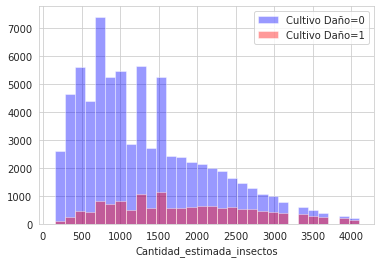

In [75]:
#Cantidad_estimada_insectos
sns.set_style('whitegrid')
sns.distplot(df[df['Cultivo_Daño']==0]['Cantidad_estimada_insectos'],bins=30,color='blue',kde=False)
sns.distplot(df[df['Cultivo_Daño']==1]['Cantidad_estimada_insectos'],bins=30,color='red',kde=False)
plt.legend(labels=['Cultivo Daño=0', 'Cultivo Daño=1'])

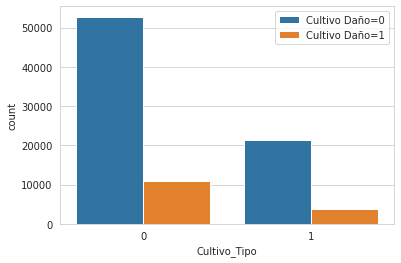

In [76]:
#Cultivo_Tipo
sns.set_style('whitegrid')
sns.countplot(x='Cultivo_Tipo',data=df,hue='Cultivo_Daño')
plt.legend(labels=['Cultivo Daño=0', 'Cultivo Daño=1'])

In [77]:
groupby_df = df.groupby(['Cultivo_Tipo', 'Cultivo_Daño']).agg({'Cultivo_Daño': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
print(groupby_df)
groupby_pcts

                           Cultivo_Daño
Cultivo_Tipo Cultivo_Daño              
0            0                    52778
             1                    10811
1            0                    21460
             1                     3809


Cultivo_Daño
Cultivo_Tipo Cultivo_Daño              
0            0                    83.00
             1                    17.00
1            0                    84.93
             1                    15.07

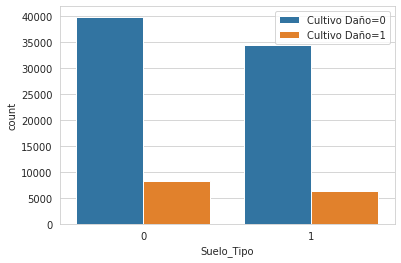

In [78]:
#Suelo_Tipo
sns.set_style('whitegrid')
sns.countplot(x='Suelo_Tipo',data=df,hue='Cultivo_Daño')
plt.legend(labels=['Cultivo Daño=0', 'Cultivo Daño=1'])

In [79]:
groupby_df = df.groupby(['Suelo_Tipo', 'Cultivo_Daño']).agg({'Cultivo_Daño': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
print(groupby_df)
groupby_pcts

                         Cultivo_Daño
Suelo_Tipo Cultivo_Daño              
0          0                    39841
           1                     8283
1          0                    34397
           1                     6337


Cultivo_Daño
Suelo_Tipo Cultivo_Daño              
0          0                    82.79
           1                    17.21
1          0                    84.44
           1                    15.56

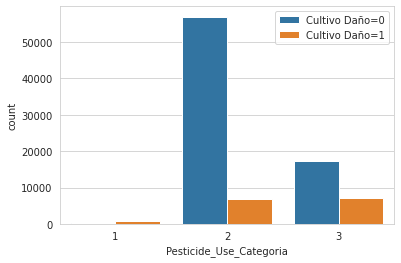

In [80]:
sns.set_style('whitegrid')
sns.countplot(x='Pesticide_Use_Categoria',data=df,hue='Cultivo_Daño')
plt.legend(labels=['Cultivo Daño=0', 'Cultivo Daño=1', 'Cultivo Daño=2'])

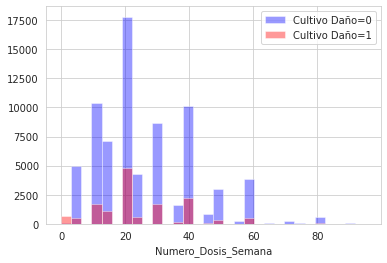

In [107]:
#Numero_Dosis_Semanana
sns.set_style('whitegrid')
sns.distplot(df[df['Cultivo_Daño']==0]['Numero_Dosis_Semana'],bins=30,color='blue',kde=False)
sns.distplot(df[df['Cultivo_Daño']==1]['Numero_Dosis_Semana'],bins=30,color='red',kde=False)
plt.legend(labels=['Cultivo Daño=0', 'Cultivo Daño=1'])

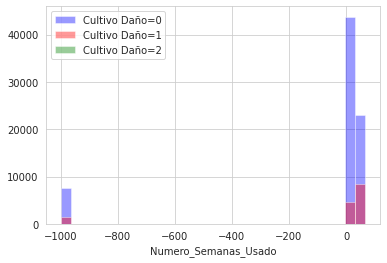

In [82]:
#Numero_Semanas_Usado
sns.set_style('whitegrid')
sns.distplot(df[df['Cultivo_Daño']==0]['Numero_Semanas_Usado'],bins=30,color='blue',kde=False)
sns.distplot(df[df['Cultivo_Daño']==1]['Numero_Semanas_Usado'],bins=30,color='red',kde=False)
sns.distplot(df[df['Cultivo_Daño']==2]['Numero_Semanas_Usado'],bins=30,color='green',kde=False)
plt.legend(labels=['Cultivo Daño=0', 'Cultivo Daño=1', 'Cultivo Daño=2'])

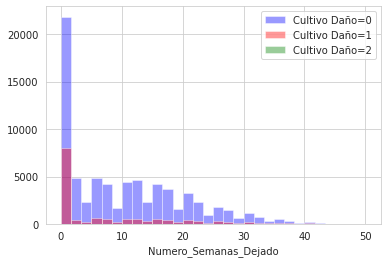

In [83]:
#Numero_Semanas_Dejado
sns.set_style('whitegrid')
sns.distplot(df[df['Cultivo_Daño']==0]['Numero_Semanas_Dejado'],bins=30,color='blue',kde=False)
sns.distplot(df[df['Cultivo_Daño']==1]['Numero_Semanas_Dejado'],bins=30,color='red',kde=False)
sns.distplot(df[df['Cultivo_Daño']==2]['Numero_Semanas_Dejado'],bins=30,color='green',kde=False)
plt.legend(labels=['Cultivo Daño=0', 'Cultivo Daño=1', 'Cultivo Daño=2'])

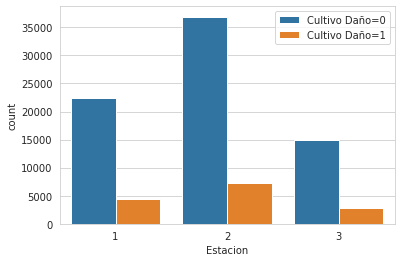

In [84]:
#Pesticide_Use_Categoria
sns.set_style('whitegrid')
sns.countplot(x='Estacion',data=df,hue='Cultivo_Daño')
plt.legend(labels=['Cultivo Daño=0', 'Cultivo Daño=1', 'Cultivo Daño=2'])

In [85]:
groupby_df = df.groupby(['Estacion', 'Cultivo_Daño']).agg({'Cultivo_Daño': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
print(groupby_df)
groupby_pcts

                       Cultivo_Daño
Estacion Cultivo_Daño              
1        0                    22493
         1                     4409
2        0                    36881
         1                     7329
3        0                    14864
         1                     2882


Cultivo_Daño
Estacion Cultivo_Daño              
1        0                    83.61
         1                    16.39
2        0                    83.42
         1                    16.58
3        0                    83.76
         1                    16.24

# Preparamos la data

In [86]:
X = df.drop(['Cultivo_Daño', 'ID'], axis=1)
y = df['Cultivo_Daño']

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 15)

# AdaBoosting Classifier

In [88]:
# importamos las librerias necesarias para el modelo

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [110]:
# Inicializamos el modelo sobre el cual vamos a realizar el AdaBoost, en este caso un arbol de decision
dt = DecisionTreeClassifier(max_depth=5, random_state=123)

# Inicializamos el Adaboost
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=500, algorithm='SAMME')

# entrenamos al modelo con los datos de prueba

adb_clf.fit(X_train, y_train)

# predecimos los datos que no conocemos
y_pred = adb_clf.predict(X_val)

In [111]:
# vamos a ver los resultados del train y test set

val_accuracy = accuracy_score(y_val, y_pred)
train_accuracy = accuracy_score(y_train, adb_clf.predict(X_train))
print('El accuracy de test set es: {:.3f}'.format(val_accuracy))
print('El accuracy de set de prueba es: {:.3f}'.format(train_accuracy))

El accuracy de test set es: 0.967
El accuracy de set de prueba es: 0.978


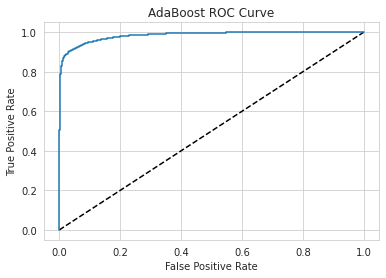

In [112]:
# para construir la roc curve, importaremos la libreria y luego utilizaremos la libreria para obtener 

from sklearn.metrics import roc_curve

y_pred_prob = adb_clf.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.show();

In [113]:
# una metrica importante es el area debajo del a curva roc y para calcularla utilizaremos la libreria
from sklearn.metrics import roc_auc_score

y_pred_prob = adb_clf.predict_proba(X_val)[:,1]
print(f'El area debajo de la curva ROC es: {roc_auc_score(y_val, y_pred_prob):.3f}')

El area debajo de la curva ROC es: 0.984


## Gradient Boosting Classifier


In [114]:
# importamos las librerias necesarias para el modelo

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [119]:
# definimos los parametros del modelo

gb_clf = GradientBoostingClassifier(learning_rate=0.5, random_state=0)


# entrenamos el modelo como siempre en sklearn
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [121]:
# Verifiquemos el accuracy del modelo para el train y val set

y_train_pred = gb_clf.predict(X_train)
y_val_pred = gb_clf.predict(X_val)

print(f'Accuracy train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy val: {accuracy_score(y_val, y_val_pred)}')

Accuracy train: 0.9596263680612216
Accuracy val: 0.9597119063695702


## Importancia de las variables

In [ ]:
# Cuanto usen un atributo particular los arboles, nos dan una magnitud de que tan importante es dicha variable para reducir impureza
# para verificar la importancia de los atributos existe un metodo llamado feature_imporances_
# veamoslo en la practica

rf_imp = pd.Series(gb_clf.feature_importances_, index=X.columns)

rf_imp.sort_values(ascending=False)

Cultivo_Daño_lag1                  0.428885
Numero_Dosis_Semana                0.239084
Numero_Dosis_Semana_lag1           0.110159
Pesticide_Use_Categoria            0.061624
Numero_Semanas_Usado               0.029754
Suelo_Tipo                         0.023168
Cantidad_estimada_insectos         0.020450
Suelo_Tipo_Daño_lag1               0.014833
Cantidad_estimada_insectos_lag1    0.013815
Numero_Dosis_Semana_lag2           0.013756
Numero_Semanas_Usado_lag1          0.011138
Cantidad_estimada_insectos_lag2    0.008732
Cultivo_Tipo                       0.004102
Pesticide_Use_Categoria_lag1       0.003874
Numero_Semanas_Dejado_lag2         0.002994
Numero_Semanas_Dejado              0.002174
Cultivo_Daño_lag2                  0.002063
Cultivo_Tipo_Daño_lag1             0.001812
Numero_Semanas_Dejado_lag1         0.001658
Pesticide_Use_Categoria_lag2       0.001578
Suelo_Tipo_Daño_lag2               0.001216
Numero_Semanas_Usado_lag2          0.001103
Cultivo_Tipo_lag2               

## Gradient Boosting Classifier


## Prediccion cambiando la cantidad de arboles

In [ ]:
# Vamos a probar con diferentes tamanos de arboles
# Para ello vamos a utilizar la funcion np.arange.

n_estimators = np.arange(100, 1601, 250)
n_estimators

array([ 100,  350,  600,  850, 1100, 1350, 1600])

In [ ]:
# Creamos un diccionario para almacenar el accuracy en funcion a la cantidad de arboles

acc_gb = {'n_estimators': [], 'acc_val': [], 'acc_train': []}

In [ ]:
for n in n_estimators:
  print(f'Entrenando el modelo con {n} arboles')
  model = GradientBoostingClassifier(random_state=0,
                                     n_estimators=n)
  

  model.fit(X_train, y_train)
  acc_gb['n_estimators'].append(n)
  acc_gb['acc_val'].append(accuracy_score(y_val, model.predict(X_val)))
  acc_gb['acc_train'].append(accuracy_score(y_train, model.predict(X_train)))

Entrenando el modelo con 100 arboles
Entrenando el modelo con 350 arboles
Entrenando el modelo con 600 arboles
Entrenando el modelo con 850 arboles
Entrenando el modelo con 1100 arboles
Entrenando el modelo con 1350 arboles
Entrenando el modelo con 1600 arboles


In [ ]:
pd.DataFrame(acc_gb)

,n_estimators,acc_val,acc_train
0,100,0.921956,0.918662
1,350,0.934841,0.937329
2,600,0.940131,0.945165
3,850,0.942888,0.951552
4,1100,0.944970,0.955716
5,1350,0.945420,0.958768
6,1600,0.946545,0.961765


## Prediccion cambiando la cantidad de atributos

In [ ]:
# Vamos a probar con diferentes tamanos de atributos
# Para ello vamos a utilizar la funcion np.arange.

cant_atri = np.arange(1, 31, 5)
cant_atri

array([ 1,  6, 11, 16, 21, 26])

In [ ]:
# Creamos un diccionario para almacenar el accuracy en funcion a la cantidad de arboles

acc_atri = {'Cantidad_atri': [], 'acc_val': [], 'acc_train': []}

In [ ]:
for atri in cant_atri:

  print(f'Entrenando el modelo con {atri} atributos')
  model = GradientBoostingClassifier(random_state=0,
                                     max_features = atri,
                                     n_estimators=850)
  

  model.fit(X_train, y_train)
  acc_atri['Cantidad_atri'].append(atri)
  acc_atri['acc_val'].append(accuracy_score(y_val, model.predict(X_val)))
  acc_atri['acc_train'].append(accuracy_score(y_train, model.predict(X_train)))

Entrenando el modelo con 1 atributos
Entrenando el modelo con 6 atributos
Entrenando el modelo con 11 atributos
Entrenando el modelo con 16 atributos
Entrenando el modelo con 21 atributos
Entrenando el modelo con 26 atributos


In [ ]:
pd.DataFrame(acc_atri)

,Cantidad_atri,acc_val,acc_train
0,1,0.923250,0.926286
1,6,0.936529,0.943632
2,11,0.939061,0.947458
3,16,0.941425,0.949821
4,21,0.942325,0.950919
5,26,0.942212,0.952016


## Prediccion cambiando el max_depth

In [ ]:
# Vamos a probar con diferentes niveles
# Para ello vamos a utilizar la funcion np.arange.

max_depth = np.arange(1, 10)
max_depth

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Creamos un diccionario para almacenar el accuracy en funcion a la cantidad de arboles

acc_md = {'Max_depth': [], 'acc_val': [], 'acc_train': []}

In [ ]:
for md in max_depth:

  model = GradientBoostingClassifier(random_state=0,
                                     max_depth=md,
                                     n_estimators=500)
  

  model.fit(X_train, y_train)
  acc_md['Max_depth'].append(md)
  acc_md['acc_val'].append(accuracy_score(y_val, model.predict(X_val)))
  acc_md['acc_train'].append(accuracy_score(y_train, model.predict(X_train)))

In [ ]:
pd.DataFrame(acc_md)

,Max_depth,acc_test,acc_train
0,1,0.8640,0.860000
1,2,0.8680,0.877500
2,3,0.8670,0.905750
3,4,0.8590,0.941625
4,5,0.8625,0.977750
5,6,0.8645,0.999125
6,7,0.8650,1.000000
7,8,0.8690,1.000000
8,9,0.8645,1.000000


## Que pasa si tenemos un max_depth = 1 y a su vez max_features = 1?

Probemos esta alternativa analizando que ocurre, y luego que pasaria si variamos otros hiperparametros.


In [ ]:
# vamos a utilizar 500 estimadores, max_depth=1, max_features=1

gb = GradientBoostingClassifier(n_estimators=500,
                                max_features= 1,
                                max_depth = 1,
                                random_state = 15)

gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=15, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

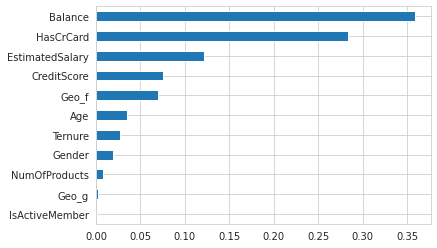

In [ ]:
sns.set_style('whitegrid')

gb_imp = pd.Series(gb.feature_importances_, index=X.columns)

gb_imp.sort_values().plot(kind='barh')

# Actividades propuestas

1- Armar 3 bucles for para testear diferentes hiperparametros en AdaBoosting


2- Buscar la mejor combinacion de hiperparametros que maximice la precision.

3- Probar con el mismo ejemplo de properatti un random forest regressor y aplicar grid search cv